In [2]:
# import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

C:\Users\r6sfxbx\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\venv_py\python3.8\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [16]:
street = [("100 Main St, Springfield, 12345, USA"),("1000 N West Street, Wilmington, 19801, USA")]
address = pd.DataFrame(street, columns = (['street']))
address

,street
0,"100 Main St, Springfield, 12345, USA"
1,"1000 N West Street, Wilmington, 19801, USA"


In [17]:
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

def lat_long(row):
    loc = locator.geocode(row["street"])
    row["latitude"] = loc.latitude
    row["longitude"] = loc.longitude
    return row

address.apply(lat_long, axis=1)

# locator.geocode('1000 N West Street, Suite 1200 Wilmington, DE 19801, USA')

,street,latitude,longitude
0,"100 Main St, Springfield, 12345, USA",42.089424,-72.578931
1,"1000 N West Street, Wilmington, 19801, USA",39.747310,-75.550090


In [7]:
#load unit code and lat long 
units = pd.read_csv('VW_LAT_LON_UNITS.csv')
#load units with names
dataset = pd.read_csv('CA_PLANT_ADDRESS.CSV')
dataset = dataset.rename(columns = {'Plant':'Unit Cd'})
#merge both datasets using Unit Code
unit_location = dataset.merge(units, on='Unit Cd')
unit_location.head()

,City,Company Code,Company Code Name,Country,Currency Key,Customer No Plant,Distribution Channel,Factory Calendar,Inter Company Billing,Landscape Name,...,Purchasing Org,Sales Org,State,Street,Tax Jurisdiction,Valuation Area,Vendor No Plant,Zip Code,Latitude,Longitude
0,Ormes,2200,JD France (Marketing),FR,EUR,NaN,1.0,22,11.0,A2,...,A000,2200,45,10 Rue du Paradis,NaN,2200,NaN,45140,47.940952,1.823131
1,Crestmead,2300,"John Deere Ltd, Australia",AU,AUD,99999T2302,25.0,A1,11.0,A2,...,A000,2300,QLD,166-170 Magnesium Drive,NaN,2302,99999T2302,4132,-27.679896,153.078519
2,Walldorf,4900,JD Walldorf GmbH & Co.KG,DE,EUR,NaN,1.0,27,11.0,A2,...,A000,2700,8,Impexstrasse 3,NaN,2700,NaN,69190,49.292415,8.663808
3,Boksburg,7J00,JD Asia Singapore SA Bran,ZA,USD,NaN,NaN,29,NaN,A2,...,A000,NaN,GP,Oscar Street 303,NaN,2900,NaN,1459,-26.184292,28.226466
4,"Langar, Notts.",3100,John Deere Limited (UK),GB,GBP,NaN,1.0,31,11.0,A2,...,P000,3100,NT,Harby Road,NaN,3100,NaN,NG 13 9HT,52.895710,-0.913240


In [8]:
#filter by US plants
us_units = unit_location.loc[unit_location['Country']== 'US']
us_units.head()

,City,Company Code,Company Code Name,Country,Currency Key,Customer No Plant,Distribution Channel,Factory Calendar,Inter Company Billing,Landscape Name,...,Purchasing Org,Sales Org,State,Street,Tax Jurisdiction,Valuation Area,Vendor No Plant,Zip Code,Latitude,Longitude
90,OLATHE,AG00,Deere & Company US-AG,US,USD,NaN,NaN,10,NaN,AG,...,A000,NaN,KS,10789 S Ridgeview Rd,KS6606100,1000,NaN,66061-6448,38.933630,-94.797405
91,LENEXA,AG00,Deere & Company US-AG,US,USD,NaN,NaN,10,NaN,AG,...,A000,NaN,KS,11145 Thompson Avenue,KS6621900,1099,NaN,66219-2302,38.925555,-94.764746
92,Moline,CF00,JDCFC - US,US,USD,99999S1700,25.0,1Q,13.0,AG,...,A000,1700,IL,1300 River Dr,IL6126500,1700,NaN,61265-1356,41.507700,-90.518832
99,Moline,9000,John Deere World Hdqrtrs,US,USD,NaN,NaN,NaN,NaN,AG,...,9000,NaN,IL,1 John Deere Pl,IL6126501,9000,NaN,61265-8010,41.478456,-90.425956
100,MOLINE,AG00,Deere & Company US-AG,US,USD,99999PAX00,25.0,1B,11.0,AG,...,A000,1000,IL,501 River Drive,IL6126500,AX01,99999PAX00,61265,41.504604,-90.533652


In [9]:
us_units.columns

Index(['City', 'Company Code', 'Company Code Name', 'Country', 'Currency Key',
       'Customer No Plant', 'Distribution Channel', 'Factory Calendar',
       'Inter Company Billing', 'Landscape Name', 'Language', 'MRP',
       'Planning Plant', 'Unit Cd', 'Plant Name', 'Plant Name Line 2',
       'Primary Landscape', 'Purchasing Org', 'Sales Org', 'State', 'Street',
       'Tax Jurisdiction', 'Valuation Area', 'Vendor No Plant', 'Zip Code',
       'Latitude', 'Longitude'],
      dtype='object')

In [11]:
#select only important columns
US_UNITS_LAT_LONG = us_units.loc[:,['City', 'Company Code', 'Company Code Name', 'Country','Unit Cd', 'Plant Name', 'Plant Name Line 2','Latitude', 'Longitude']]
#export to csv
US_UNITS_LAT_LONG.head()

,City,Company Code,Company Code Name,Country,Unit Cd,Plant Name,Plant Name Line 2,Latitude,Longitude
90,OLATHE,AG00,Deere & Company US-AG,US,1000,John Deere JDAMC,a division of Deere & Company,38.933630,-94.797405
91,LENEXA,AG00,Deere & Company US-AG,US,1099,John Deere JDAMC (In-Transit),a division of Deere & Company,38.925555,-94.764746
92,Moline,CF00,JDCFC - US,US,1700,JD C&F US Marketing Branch,Subsidiary of Deere & Company,41.507700,-90.518832
99,Moline,9000,John Deere World Hdqrtrs,US,9000,Deere & Company,John Deere World Headquarters,41.478456,-90.425956
100,MOLINE,AG00,Deere & Company US-AG,US,AX01,John Deere Seeding-Moline,a division of Deere & Company,41.504604,-90.533652


In [13]:
#export to csv (optional)
US_UNITS_LAT_LONG.to_csv('US_units_lat_long.csv')

In [14]:
#convert from lat long to point geodataframe to plot
gdf = gpd.GeoDataFrame(
    unit_location, 
    geometry=gpd.points_from_xy(unit_location.Longitude, unit_location.Latitude))
gdf.head()

,City,Company Code,Company Code Name,Country,Currency Key,Customer No Plant,Distribution Channel,Factory Calendar,Inter Company Billing,Landscape Name,...,Sales Org,State,Street,Tax Jurisdiction,Valuation Area,Vendor No Plant,Zip Code,Latitude,Longitude,geometry
0,Ormes,2200,JD France (Marketing),FR,EUR,NaN,1.0,22,11.0,A2,...,2200,45,10 Rue du Paradis,NaN,2200,NaN,45140,47.940952,1.823131,POINT (1.82313 47.94095)
1,Crestmead,2300,"John Deere Ltd, Australia",AU,AUD,99999T2302,25.0,A1,11.0,A2,...,2300,QLD,166-170 Magnesium Drive,NaN,2302,99999T2302,4132,-27.679896,153.078519,POINT (153.07852 -27.67990)
2,Walldorf,4900,JD Walldorf GmbH & Co.KG,DE,EUR,NaN,1.0,27,11.0,A2,...,2700,8,Impexstrasse 3,NaN,2700,NaN,69190,49.292415,8.663808,POINT (8.66381 49.29241)
3,Boksburg,7J00,JD Asia Singapore SA Bran,ZA,USD,NaN,NaN,29,NaN,A2,...,NaN,GP,Oscar Street 303,NaN,2900,NaN,1459,-26.184292,28.226466,POINT (28.22647 -26.18429)
4,"Langar, Notts.",3100,John Deere Limited (UK),GB,GBP,NaN,1.0,31,11.0,A2,...,3100,NT,Harby Road,NaN,3100,NaN,NG 13 9HT,52.895710,-0.913240,POINT (-0.91324 52.89571)


In [16]:
#get only plant name and geometry
units_geo = gdf.loc[:,['Plant Name','geometry']]
units_geo.head()

,Plant Name,geometry
0,John Deere Ormes,POINT (1.82313 47.94095)
1,John Deere Limited - Brisbane,POINT (153.07852 -27.67990)
2,John Deere Vertrieb,POINT (8.66381 49.29241)
3,JD Asia Singapore,POINT (28.22647 -26.18429)
4,John Deere Limited,POINT (-0.91324 52.89571)


In [2]:
#read data shape we need fiona library for this
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

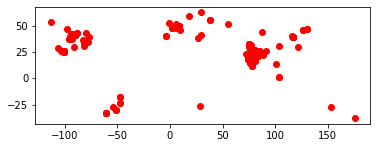

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# geo_dataset.plot(ax=ax, color="white", edgecolor="black");
units_geo.plot(ax=ax, color="red")